# Lecture 1 - What is Computed Tomography

# Contents

* A bit of history
* Physics of X-rays
* The Radon Transform
* Computed Tomography

# A bit of History

X-rays where accidentally discovered in 1895 by Wilhelm Röntgen

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Wilhelm_R%C3%B6ntgen_by_Nicola_Perscheid_1915b.jpg/532px-Wilhelm_R%C3%B6ntgen_by_Nicola_Perscheid_1915b.jpg)

The first published X-ray photograph of the hand of Anna Bertha Ludwig (Röntgen's wife)

![](https://upload.wikimedia.org/wikipedia/commons/7/79/First_medical_X-ray_by_Wilhelm_R%C3%B6ntgen_of_his_wife_Anna_Bertha_Ludwig%27s_hand_-_18951222.jpg?20161118110034)

* X-ray photography was soon adopted for medical use and even recreational use
* The potential dangers of prolonged exposure to X-rays was not recognized untill much later
* X-ray photography is still an important tool for medical diagnosis

The first prototype CT scanner was built in 1961 by William Oldendorf

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/RIMG0277.JPG/440px-RIMG0277.JPG)

The first commercial scanner, developed by Godfrey Hounsfield, became available in 1971. A scan took 5 minutes, and processing the data took around 2.5 hours.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Emi1010.jpg/440px-Emi1010.jpg)

The mathematics behind tomography was developed partially independent of scanning technology

* 1917: Johan Radon described a method for reconstruction a function from its line integrals
* 1937: Stefan Kaczmarz developed a method to find an approximate solution to a large system of linear algebraic equations
* 1963-1964: Allan MacLeod Cormack published 2 landmark papers on tomographic image reconstruction

Computed Tomography is still an active area of research in Mathematics.

# The Physics of X-rays

When passing through an object, an X-ray beam loses intensity through absorption and scattering. This process can be approximately described by the Beer-Lambert law:

$$I = I_0 \exp^{-\mu h},$$

where

* $I_0$ is the intensity of the incoming X-ray beam
* $I$ is the intensity of the outgoing X-ray beam
* $\mu$ is the linear attenuation coefficient of the material
* $h$ is the thickness of the material

* detection, Poisson, multi-energy, log correction, non-homogeneous materials

# The Radon Transform

In a CT-scanner, measurements are collected for several rays along different angles, resulting in a *sinogram*

This transformation, from an image $u(x,y)$ to a sinogram $f(s,\theta)$ is described by the Radon transform

$$f(s,\theta) = \int ...$$

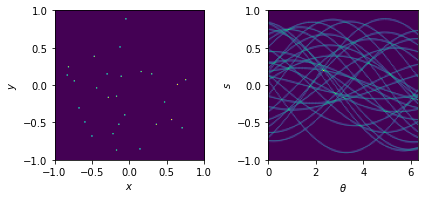

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk
from skimage.transform import radon

# settings
nx = 128
theta = np.linspace(0., 180., nx)

# phantom
mask = np.zeros((nx,nx))
ii,jj = disk((nx//2,nx//2),0.9 * (nx//2))
mask[ii,jj] = 1

u = np.zeros((nx,nx))
u = np.array(np.abs(np.random.randn(nx,nx)) >= 3, dtype=np.float)
u *= mask

# sinogram
f = radon(u, theta=theta)

# plot
fig,ax = plt.subplots(1,2)

ax[0].imshow(u,extent=(-1,1,-1,1),vmin=0)
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_aspect(1)

ax[1].imshow(f,extent=(0,2*np.pi,-1,1),vmin=0)
ax[1].set_xlabel(r'$\theta$')
ax[1].set_ylabel(r'$s$')
ax[1].set_aspect(np.pi)

fig.tight_layout()

plt.savefig('./figures/lecture1/sino_dots.png',dpi=300)

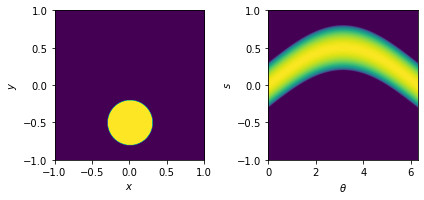

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk
from skimage.transform import radon

# settings
nx = 512
theta = np.linspace(0., 180., nx)

# phantom
ii,jj = disk((nx//2+nx//4,nx//2),0.3 * (nx//2))
u = np.zeros((nx,nx))
u[ii,jj] = 1

# sinogram
f = radon(u, theta=theta)

# plot
fig,ax = plt.subplots(1,2)

ax[0].imshow(u,extent=(-1,1,-1,1),vmin=0)
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_aspect(1)

ax[1].imshow(f,extent=(0,2*np.pi,-1,1),vmin=0)
ax[1].set_xlabel(r'$\theta$')
ax[1].set_ylabel(r'$s$')
ax[1].set_aspect(np.pi)

fig.tight_layout()

plt.savefig('./figures/lecture1/sino_circle.png',dpi=300)

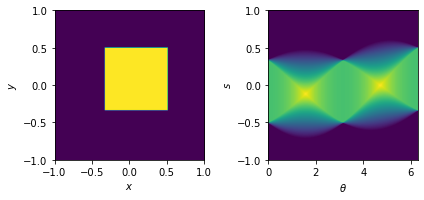

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk, rectangle
from skimage.transform import radon

# settings
nx = 512
theta = np.linspace(0., 180., nx)

# phantom
ii,jj = rectangle((nx//4,nx//3),end=(2*nx//3,3*nx//4))
u = np.zeros((nx,nx))
u[ii,jj] = 1

# sinogram
f = radon(u, theta=theta)

# plot
fig,ax = plt.subplots(1,2)

ax[0].imshow(u,extent=(-1,1,-1,1),vmin=0)
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_aspect(1)

ax[1].imshow(f,extent=(0,2*np.pi,-1,1),vmin=0)
ax[1].set_xlabel(r'$\theta$')
ax[1].set_ylabel(r'$s$')
ax[1].set_aspect(np.pi)

fig.tight_layout()

plt.savefig('./figures/lecture1/sino_rect.png',dpi=300)

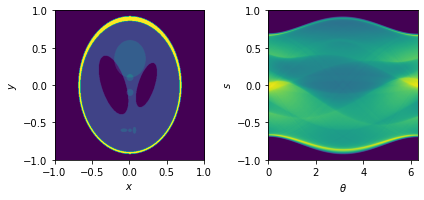

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk, rectangle
from skimage.transform import radon
from skimage.data import shepp_logan_phantom

# settings
nx = 400
theta = np.linspace(0., 180., nx)

# phantom
u = shepp_logan_phantom()

# sinogram
f = radon(u, theta=theta)

# plot
fig,ax = plt.subplots(1,2)

ax[0].imshow(u,extent=(-1,1,-1,1),vmin=0)
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_aspect(1)

ax[1].imshow(f,extent=(0,2*np.pi,-1,1),vmin=0)
ax[1].set_xlabel(r'$\theta$')
ax[1].set_ylabel(r'$s$')
ax[1].set_aspect(np.pi)

fig.tight_layout()

plt.savefig('./figures/lecture1/sino_shepplogan.png',dpi=300)

![](./figures/lecture1/sino_dots.png)

![](./figures/lecture1/sino_circle.png)

![](./figures/lecture1/sino_rect.png)

![](./figures/lecture1/sino_shepplogan.png)

# Computed Tomography

The goal of Computed Tomography is to reconstruction an image $u$ from its sinogram $f$.

* Is the transform invertible?
* What happens if the data are noisy?
* What happens if the data are subsampled?